## Qiskit Things That Learn 

In [10]:
import qiskit as q
import numpy as np 
from numpy import linalg
from IPython.display import display as disp , Math, Latex

In [11]:
# Importing State Vectoras 
from qiskit.quantum_info import Statevector, Operator

### Visulization Tools

In [12]:
# Importing Visualization Tools
from qiskit.visualization import (plot_histogram, 
    plot_bloch_multivector, plot_state_qsphere, plot_state_paulivec,
    plot_gate_map, plot_circuit_layout)

### Simulating Tools

In [13]:
from qiskit import Aer
## Preparing Backend
sv_sim = Aer.get_backend('statevector_simulator')
qasm_sim = Aer.get_backend('qasm_simulator')

### Working With State Vector 

In [5]:
u = Statevector([1/np.sqrt(2), 1/np.sqrt(2)])
v = Statevector([(1+2.j)/3, -2/3])
w = Statevector([1/3, 2/3])

disp(u.draw('latex'),v.draw('latex'),w.draw('latex'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [6]:
disp(u.draw('text'))
disp(u.draw('latex'))

[0.70710678+0.j,0.70710678+0.j]

<IPython.core.display.Latex object>

In [7]:
display(u.is_valid())
display(v.is_valid())
display(w.is_valid())

True

True

False

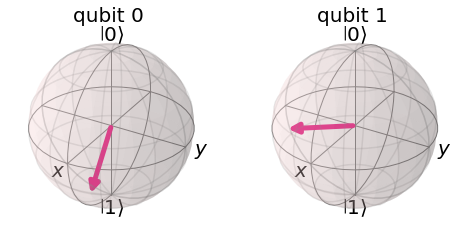

In [8]:
# State vector in normalized form
a = np.array([1,4,-3j, 1-4j])
a/= linalg.norm(a)
u = Statevector(a)
disp(plot_bloch_multivector(u))

### Measuring Statevector

Before Mesurement Statevector V :


<IPython.core.display.Latex object>

Probablity to collaps on 0 : 0.5555555555555556 
Probablity to collaps on 1 : 0.4444444444444444 





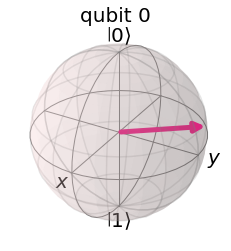

In [9]:
v = Statevector([(1+2.j)/3, -2/3])
print("Before Mesurement Statevector V :")
disp(v.draw('latex'))

prob_0 = linalg.norm(np.array(v)[0])**2
prob_1 = linalg.norm(np.array(v)[1])**2
 
print(f"Probablity to collaps on 0 : {prob_0} ")
print(f"Probablity to collaps on 1 : {prob_1} ")
print(2*"\n")

plot_bloch_multivector(v)

Measure respect to  '0' and V' is : 


<IPython.core.display.Latex object>

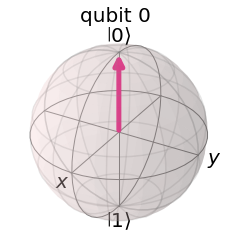

In [10]:
qubit_basis, v_prime = v.measure()

print(f"Measure respect to  '{qubit_basis}' and V' is : ")

disp(v_prime.draw('latex'))

plot_bloch_multivector(v_prime,figsize=(4,4))

{'0': 578, '1': 422}

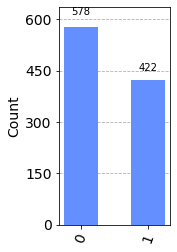

In [11]:
statistics = v.sample_counts(1000)
display(statistics)
disp(plot_histogram(statistics,figsize=(2,4)))

### Quantum Operator

In [12]:
pauli_x = np.array([[0,1],[1,0]], dtype=complex)
pauli_y = np.array([[0,-1j],[1j,0]],dtype=complex)
H = np.array([[1,1],[1,-1]],dtype=complex)
H /= linalg.norm(H)
pauli_x = Operator(pauli_x)
pauli_y = Operator(pauli_x)
h = Operator(H)

disp(pauli_y)
disp(pauli_x)
disp(h)

Operator([[0.+0.j, 1.+0.j],
          [1.+0.j, 0.+0.j]],
         input_dims=(2,), output_dims=(2,))

Operator([[0.+0.j, 1.+0.j],
          [1.+0.j, 0.+0.j]],
         input_dims=(2,), output_dims=(2,))

Operator([[ 0.5+0.j,  0.5+0.j],
          [ 0.5+0.j, -0.5+0.j]],
         input_dims=(2,), output_dims=(2,))

<IPython.core.display.Latex object>

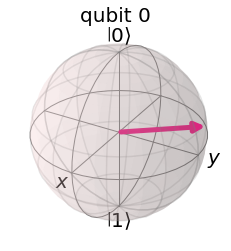

In [13]:
disp(v.evolve(pauli_x).draw('latex'))
plot_bloch_multivector(v,figsize=(4,4))

### Quantum Circuit 

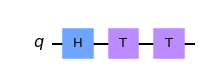

In [14]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(1)

circuit.h(0)
circuit.t(0)
# circuit.h(0)
circuit.t(0)
# circuit.z(0)

disp(circuit.draw('mpl'))

In [15]:
ket0 = Statevector([1,0])
output_state_vector = ket0.evolve(circuit)
output_state_vector.draw('latex')

<IPython.core.display.Latex object>

### Tensor Product 

$|\phi \rangle = \sum\limits_{a \in \Sigma}\alpha_a |a\rangle \;\;\; \text{and}\;\;\; |\psi\rangle =  \sum\limits_{b \in \Gamma} \beta_a |b\rangle$ <br><br>
$|\phi\rangle \otimes |\psi\rangle  = \large{\sum\limits_{\normalsize{(a,b) \in \Sigma\times\Gamma}}} \normalsize{\alpha_a\beta_b|ab\rangle}$
<br><br>
let $|\pi\rangle = |\phi\rangle|\psi\rangle$ then $\langle ab|\pi\rangle = \langle a|\phi\rangle\langle b|\psi\rangle \;\;\; \forall a,b \in \Sigma,\Gamma$ 

In [16]:
ket0,ket1 = Statevector.from_label('1'),Statevector.from_label('1')
ket0ket1 = ket0.tensor(ket1)
ket0ket1.draw('latex')


<IPython.core.display.Latex object>

### Tensor Product of Matrices 

$\mathcal{M} = \sum\limits_{a,b\in\Sigma}\alpha_{ab}|a\rangle\langle b| \;\;\;\; \mathcal{N} = \sum\limits_{c,d\in\Gamma}\beta_{cd}|c\rangle\langle d|$
<br><br>
$\mathcal{M}\otimes\mathcal{N} = \sum\limits_{a,b\in \Sigma} \sum\limits_{c,d\in\Gamma} \alpha_{ab}\beta_{cd}|ab\rangle\langle cd|$

### Entanglement 

#### Chalange 
Can you create each of the Bell states using only single-qubit state vectors and the CNOT operator?

In [17]:
from qiskit import BasicAer
backend = BasicAer.get_backend('statevector_simulator')

In [18]:
def draw_circuit_and_statevector(circuit):
    disp(circuit.draw('mpl'))
    sv_bell_00 = q.execute(circuit,backend = backend).result().get_statevector()
    disp(Statevector(sv_bell_00).draw('latex'))

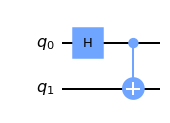

<IPython.core.display.Latex object>

In [19]:
bell_00= q.QuantumCircuit(2)
bell_00.h(0)
bell_00.cnot(0,1)
draw_circuit_and_statevector(bell_00)

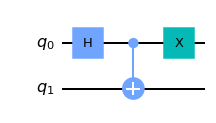

<IPython.core.display.Latex object>

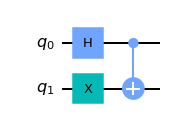

<IPython.core.display.Latex object>

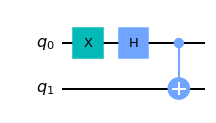

<IPython.core.display.Latex object>

In [20]:
bell_01 = q.QuantumCircuit(2)
bell_01.h(0)
bell_01.cx(0,1)
bell_01.x(0)

draw_circuit_and_statevector(bell_01)

bell_01 = q.QuantumCircuit(2)
bell_01.h(0)
bell_01.x(1)
bell_01.cx(0,1)

draw_circuit_and_statevector(bell_01)

bell_10 = q.QuantumCircuit(2)
bell_10.x(0)
bell_10.h(0)
bell_10.cx(0,1)

draw_circuit_and_statevector(bell_10)

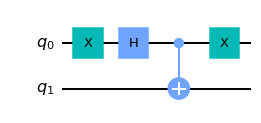

<IPython.core.display.Latex object>

In [21]:
bell_11 = q.QuantumCircuit(2)
bell_11.x(0)
bell_11.h(0)
bell_11.cx(0,1)
bell_11.x(0)

draw_circuit_and_statevector(bell_11)

### Visualization Study

- plot_histogram
- plot_bloch_multivector
- plot_state_qsphere
- plot_state_paulivec
- plot_gate_map
- plot_circuit_layout

In [24]:
# Define Base Parameter 
n_qubit = 4

# Define Circuit
qr = q.QuantumRegister(n_qubit,'\psi')
cr = q.ClassicalRegister(n_qubit,'c')
circuit = q.QuantumCircuit(qr,cr,name="PracticeCircuir7")

# Applying Gate to change state of Qubit
# circuit.h(range(n_qubit))
for qubit in range(n_qubit):
    circuit.h(qubit)
    for o_qubit in range(qubit+1,n_qubit):
        cu1 = q.circuit.library.CU1Gate(np.pi/(2**(o_qubit-qubit)))
        circuit.append(cu1,[o_qubit, qubit])
    circuit.barrier()
    for o_qubit in range(qubit+1,n_qubit):
        circuit.cs(o_qubit, qubit)


## Executiom to get Statevectors 
result = q.execute(circuit,sv_sim).result()
state_vector = result.get_statevector()
disp(state_vector.draw('latex'))


circuit.draw('mpl', fold=False)

# Plot Bloach Sphere for individual Qubit
plot_bloch_multivector(state_vector)

# Plot Q-Sphere 
plot_state_qsphere(state_vector)
disp(None)

<IPython.core.display.Latex object>

None

In [23]:
disp(plot_circuit_layout(
    circuit = circuit, backend = qasm_sim)

SyntaxError: incomplete input (279261505.py, line 2)

### Standard Gate 

In [1]:
import qiskit.circuit.library.standard_gates as gate

In [5]:
print(dir(gate))

['C3SXGate', 'C3XGate', 'C4XGate', 'CCXGate', 'CCZGate', 'CHGate', 'CPhaseGate', 'CRXGate', 'CRYGate', 'CRZGate', 'CSGate', 'CSXGate', 'CSdgGate', 'CSwapGate', 'CU1Gate', 'CU3Gate', 'CUGate', 'CXGate', 'CYGate', 'CZGate', 'DCXGate', 'ECRGate', 'GlobalPhaseGate', 'HGate', 'IGate', 'MCPhaseGate', 'MCU1Gate', 'MCXGate', 'MCXGrayCode', 'MCXRecursive', 'MCXVChain', 'PhaseGate', 'RC3XGate', 'RCCXGate', 'RGate', 'RXGate', 'RXXGate', 'RYGate', 'RYYGate', 'RZGate', 'RZXGate', 'RZZGate', 'SGate', 'SXGate', 'SXdgGate', 'SdgGate', 'SwapGate', 'TGate', 'TdgGate', 'U1Gate', 'U2Gate', 'U3Gate', 'UGate', 'XGate', 'XXMinusYYGate', 'XXPlusYYGate', 'YGate', 'ZGate', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'dcx', 'ecr', 'equivalence_library', 'get_standard_gate_name_mapping', 'global_phase', 'h', 'i', 'iSwapGate', 'iswap', 'mcrx', 'mcry', 'mcrz', 'multi_control_rotation_gates', 'p', 'r', 'rx', 'rxx', 'ry', 'ryy', 'rz', 'rzx', 'r

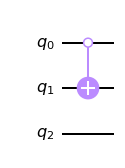

In [35]:
cx = gate.XGate().control(1,ctrl_state='0')
circ = q.QuantumCircuit(3)
# circ.x([0,2])
circ.append(cx,[0,1])
disp(circ.draw('mpl'))
# qasm_sim.run(circ).result().get_statevector().draw('latex')

# 